In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt #para graficar dando especificaciones del gráfico

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

#IMPORTAR LIBRERIAS NECESARIAS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:

df=pd.read_csv('df_sentiment_clean.csv')
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,US,Spain,US,US,France
description,This tremendous 100% varietal wine hails from ...,"Ripe aromas of fig, blackberry and cassis are ...",Mac Watson honors the memory of a wine once ma...,"This spent 20 months in 30% new French oak, an...","This is the top wine from La Bégude, named aft..."
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend


In [ ]:
df.info()

In [3]:
df=df.drop(columns=['description','clean_description3'])
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,US,Spain,US,US,France
designation,Martha's Vineyard,Carodorum Selección Especial Reserva,Special Selected Late Harvest,Reserve,La Brûlade
points,96,96,96,96,95
price,235.0,110.0,90.0,65.0,66.0
province,California,Northern Spain,California,Oregon,Provence
region_1,Napa Valley,Toro,Knights Valley,Willamette Valley,Bandol
region_2,Napa,region_2_unknown,Sonoma,Willamette Valley,region_2_unknown
variety,Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir,Provence red blend
winery,Heitz,Bodega Carmen Rodríguez,Macauley,Ponzi,Domaine de la Bégude


In [ ]:
df.isnull().sum()

In [4]:
df=df.dropna()
df.isnull().sum()

Unnamed: 0            0
country               0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
variety               0
winery                0
sentiment             0
subjectivity          0
sentiment_category    0
dtype: int64

In [ ]:
target='sentiment_category'
X=df.drop(columns=[target])
y=df[target]

In [ ]:
y.info()

In [ ]:
X.isnull().sum()


In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=123, stratify=y)

In [ ]:
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [ ]:
num_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
    

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train,y_train)

In [ ]:
y_pred = pipeline.predict(X_test)
#y_test.shape

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
disp.plot()
#plt.figure(figsize=(150,200))
plt.show()

In [ ]:
df['country'].value_counts()

In [5]:
# Calcular conteos por país
conteos = df['country'].value_counts()

# Filtrar países que cumplen el criterio
tenk_country = conteos[(conteos >= 1000) & (conteos <= 10000)].index

# Filtrar el DataFrame original
df_filt = df[df['country'].isin(tenk_country)]

In [ ]:
df_filt.sample(10).transpose()

In [6]:
target='country'
X=df_filt.drop(columns=[target])
y=df_filt[target]

In [7]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=123, stratify=y)

In [8]:
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [9]:
num_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
    

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [11]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unnamed: 0', 'points', 'price', 'sentiment', 'subjectivity'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['designation', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'sentiment_category'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [12]:
y_pred = pipeline.predict(X_test)
#y_test.shape

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Argentina       1.00      1.00      1.00       862
   Australia       1.00      1.00      1.00       788
     Austria       1.00      0.98      0.99       490
       Chile       0.98      1.00      0.99       934
     Germany       0.98      0.99      0.99       382
 New Zealand       0.97      0.98      0.97       466
    Portugal       1.00      0.99      1.00       877
South Africa       0.99      0.96      0.97       370
       Spain       1.00      1.00      1.00      1361

    accuracy                           0.99      6530
   macro avg       0.99      0.99      0.99      6530
weighted avg       0.99      0.99      0.99      6530



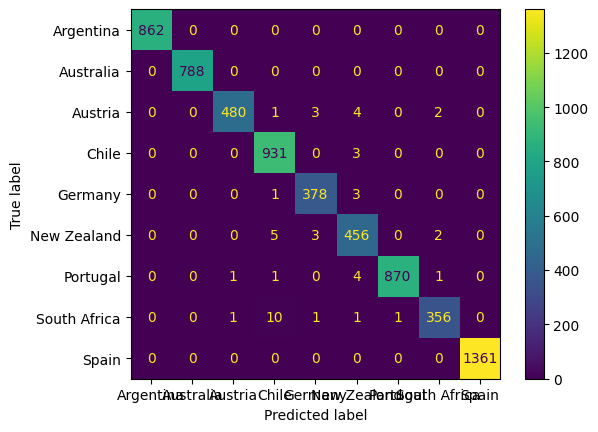

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
disp.plot()
#plt.figure(figsize=(150,200))
plt.show()

          ========= GRID SEARCH CV ===========



In [15]:

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import GridSearchCV

In [16]:

num_car=X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_car=X.select_dtypes(include=['object']).columns.tolist()


x_train, x_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.4, random_state=123
)
x_val, x_test, y_val, y_test = train_test_split(
    x_resto, y_resto, test_size=0.5, random_state=321
)

#cat_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), num_car),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_car)

    ])
#cat_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

#cambia transformers

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

 #Pipeline 
#pipeline = Pipeline([
#    ('scaler', MinMaxScaler(feature_range=(-1, 1))),
#    ('classifier', RandomForestClassifier(random_state=42))
#])


#red (grid)
param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_leaf': [1, 3]
}


#Envoltura del pipeline en GridSearchCV 
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                # 5-fold CV sobre el train
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar (usa x_train, no toca val/test)
grid.fit(x_train, y_train)

# Evaluar con el mejor modelo seleccionado
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy en test:", grid.score(x_test, y_test))

#Generar predicciones con el mejor estimador
print("Predicciones:", grid.predict(x_test))



Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
Accuracy en test: 0.9919601837672282
Predicciones: ['Spain' 'Spain' 'Spain' ... 'Portugal' 'Portugal' 'Germany']


In [18]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Evaluar con el mejor modelo seleccionado
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy en test:", grid.score(x_test, y_test))

#Generar predicciones con el mejor estimador
print("Predicciones:", grid.predict(x_test))


Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
Accuracy en test: 0.9919601837672282
Predicciones: ['Spain' 'Spain' 'Spain' ... 'Portugal' 'Portugal' 'Germany']


In [19]:
# Después de grid.fit(x_train, y_train)

# 1. Obtener el mejor modelo
best_model = grid.best_estimator_

# 2. Evaluar en VALIDATION set (para ajuste final)
val_accuracy = best_model.score(x_val, y_val)
print(f"Accuracy en Validation: {val_accuracy:.4f}")

# 3. Evaluar en TEST set (evaluación final)
test_accuracy = best_model.score(x_test, y_test)
print(f"Accuracy en Test: {test_accuracy:.4f}")

Accuracy en Validation: 0.9935
Accuracy en Test: 0.9920


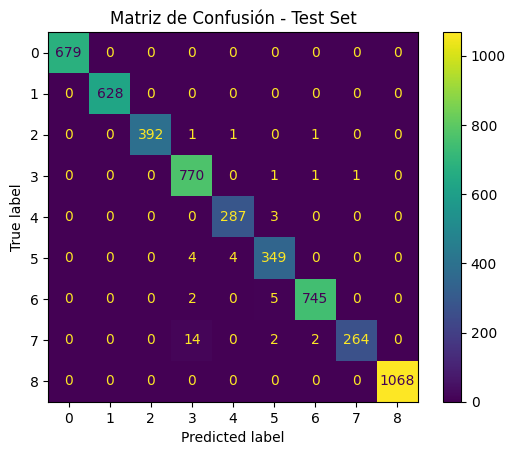


REPORTE DE CLASIFICACIÓN COMPLETO
              precision    recall  f1-score   support

   Argentina       1.00      1.00      1.00       679
   Australia       1.00      1.00      1.00       628
     Austria       1.00      0.99      1.00       395
       Chile       0.97      1.00      0.98       773
     Germany       0.98      0.99      0.99       290
 New Zealand       0.97      0.98      0.97       357
    Portugal       0.99      0.99      0.99       752
South Africa       1.00      0.94      0.97       282
       Spain       1.00      1.00      1.00      1068

    accuracy                           0.99      5224
   macro avg       0.99      0.99      0.99      5224
weighted avg       0.99      0.99      0.99      5224



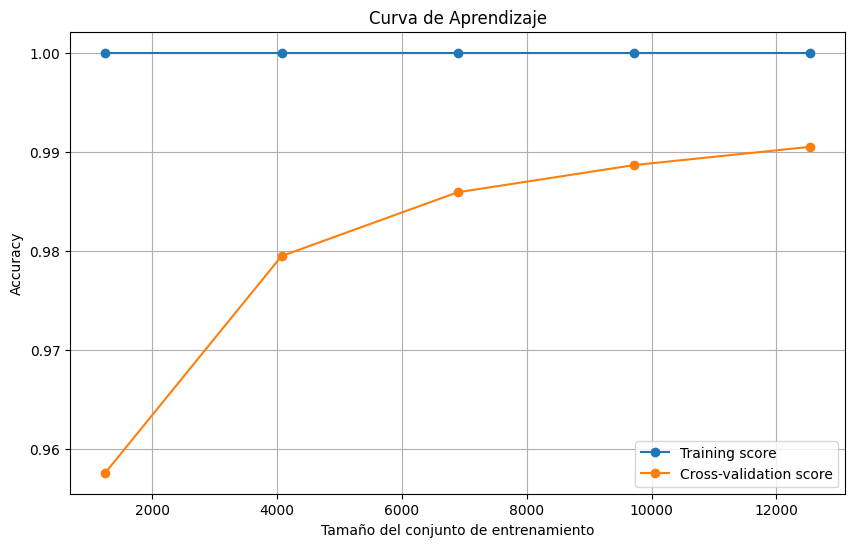

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

y_pred = best_model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión - Test Set")
plt.show()

# Reporte de clasificación completo
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN COMPLETO")
print("="*50)
print(classification_report(y_test, y_pred))
# Curva de aprendizaje (opcional pero muy útil)
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



Top 10 características más importantes:
                        feature  importance
6614  region_1_region_1_unknown    0.068656
6333  province_Mendoza Province    0.044122
6350    province_Northern Spain    0.036546
6522           region_1_Mendoza    0.030653
6384   province_South Australia    0.029792
6792     variety_Portuguese Red    0.023503
6328       province_Marlborough    0.021989
6802           variety_Riesling    0.020637
6725             variety_Malbec    0.014930
2                         price    0.014034


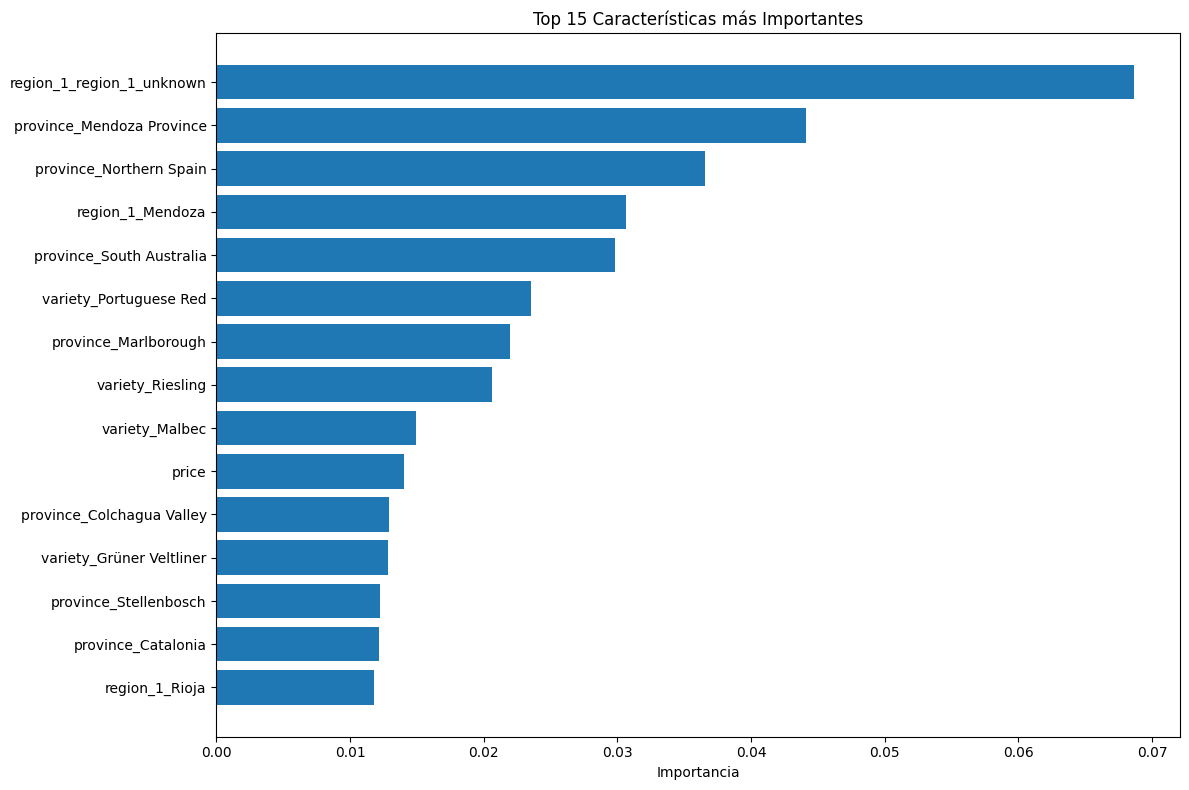

In [21]:
# Importancia de features (solo si usas RandomForest)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Obtener nombres de features después del preprocesamiento
    feature_names = []
    
    # Para variables numéricas
    if 'num' in best_model.named_steps['preprocessor'].named_transformers_:
        feature_names.extend(num_car)
    
    # Para variables categóricas (OneHotEncoder)
    if 'cat' in best_model.named_steps['preprocessor'].named_transformers_:
        ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(cat_car)
        feature_names.extend(cat_features)
#obtener importancias
    importances = best_model.named_steps['classifier'].feature_importances_

   # Crear DataFrame con importancias
    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 características más importantes:")
    print(feat_imp_df.head(10))

    # Gráfico de importancias
    plt.figure(figsize=(12, 8))
    plt.barh(feat_imp_df['feature'][:15], feat_imp_df['importance'][:15])
    plt.title('Top 15 Características más Importantes')
    plt.xlabel('Importancia')    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



////////////////comparar modelos de ML/////////////////////////

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV  #se añade GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Partición en entrenamiento, validación y prueba#X.dtypes

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

x_train, x_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.4, random_state=123
)
x_val, x_test, y_val, y_test = train_test_split(
    x_resto, y_resto, test_size=0.5, random_state=321
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline con preprocesamiento
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_leaf': [1, 3]
}

#Envoltura del pipeline en GridSearchCV 
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                # 5-fold CV sobre el train
    scoring='accuracy',
    n_jobs=-1
)
# Entrenar (usa x_train, no toca val/test)
grid.fit(x_train, y_train)

# Evaluar con el mejor modelo seleccionado
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy en test:", grid.score(x_test, y_test))

#Generar predicciones con el mejor estimador
print("Predicciones:", grid.predict(x_test))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")
#print(f"Class distribution in test: No={sum(y_test==0)}, Yes={sum(y_test==1)}\n")


In [ ]:
print(y.info())
print(X.info())

In [52]:
# List of classification models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Train and evaluate
results = {}
predictions = {}
conf_matrices = {}

for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}
    predictions[name] = y_pred
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"{name} - Acc: {acc:.3f}, Prec: {prec:.3f}, Rec: {rec:.3f}, F1: {f1:.3f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
results_df.columns = ['Model', 'Metric', 'Value']

# -----------------------------
# Model Performance Comparison Plot
# -----------------------------
print("📊 Model Performance Comparison Bar Plot\n")
plt.figure(figsize=(14, 8))
sns.barplot(data=results_df, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Classification Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.suptitle('Higher = better | Tree ensembles (RF/GB) often excel on lifestyle data',
             fontsize=10, color='gray')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# -----------------------------
# Confusion Matrices
# -----------------------------
print("📊 Confusion Matrices for All Models\n")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {results[name]["Accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xticklabels(['No', 'Yes'])
    axes[idx].set_yticklabels(['No', 'Yes'])
fig.delaxes(axes[-1])  # Remove empty subplot
plt.suptitle('Confusion Matrices - Digestive Issues Prediction', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------
# Detailed Classification Report (Best Model Example)
# -----------------------------
best_model_name = max(results, key=lambda x: results[x]['F1'])
print(f"📋 Detailed Report for Best Model ({best_model_name})\n")
print(classification_report(y_test, predictions[best_model_name], target_names=['No Issues', 'Has Issues']))

# -----------------------------
# Feature Importance (Tree-based Models)
# -----------------------------
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

print("📊 Feature Importance for Tree-Based Models\n")
for name in tree_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', models[name])])
    pipeline.fit(X_train, y_train)
    
    # Feature names after preprocessing
    ohe_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(ohe_features)
    
    importances = pipeline.named_steps['model'].feature_importances_
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=all_features, palette='magma')
    plt.title(f'Feature Importance - {name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.suptitle('Fast_Food_Meals_Per_Week, Energy_Level_Score often key predictors',
                 fontsize=10, color='gray')
    plt.tight_layout()
    plt.show()

    
print("✅ All classification models trained & visualized!")
print("\n🔍 Key Insights:")
print("   • Models can predict digestive issues reasonably well (F1 ~0.7-0.85 typical)")
print("   • Fast_Food_Meals_Per_Week usually most important feature → supports health impact hypothesis")
print("   • High recall = good at catching people WITH issues (important for health screening)")
print("   • Ensemble models (Random Forest / Gradient Boosting) usually best")
print("\n🚀 Next: Hyperparameter tuning, cross-validation, or deploy best model!")

Training Decision Tree...


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].